In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf

In [6]:

mnist = tf.keras.datasets.mnist

In [7]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
training_images = training_images[:1000]
training_labels = training_labels[:1000]
test_images = test_images[:100]
test_labels = test_labels[:100]

(224, 224, 3)


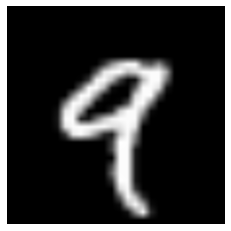

In [34]:
# plot some samples
img = training_images[4]
print(img.shape)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

(224, 224, 3)


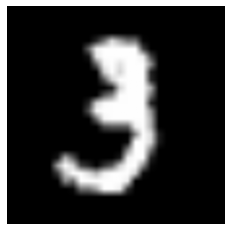

In [35]:
# plot some samples
img = training_images[10]
print(img.shape)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
test_images = test_images / 255.0

In [10]:
training_images = tf.map_fn(lambda i: tf.stack([i]*3, axis=-1), training_images).numpy()
test_images = tf.map_fn(lambda i: tf.stack([i]*3, axis=-1), test_images).numpy()

In [11]:
training_images = tf.image.resize(training_images, [224, 224]).numpy()
test_images = tf.image.resize(test_images, [224, 224]).numpy()

In [12]:
training_images = training_images.reshape(1000, 224, 224, 3)
training_images = training_images / 255.0
test_images = test_images.reshape(100, 224, 224, 3)


Normlising the test images

In [21]:
test_images = test_images / 255.0

In [13]:
training_labels = tf.keras.utils.to_categorical(training_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)


In [14]:
num_len_train = int(0.8 * len(training_images))

In [15]:
ttraining_images = training_images[:num_len_train]
ttraining_labels = training_labels[:num_len_train]

In [16]:

valid_images = training_images[num_len_train:]
valid_labels = training_labels[num_len_train:]

In [17]:
training_images = ttraining_images
training_labels = ttraining_labels

In [18]:
model = tf.keras.models.Sequential([
                                    
		tf.keras.layers.Conv2D(96, (7, 7), strides=(2, 2), activation='relu',
			input_shape=(224, 224, 3)),
		tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Lambda(lambda x: tf.image.per_image_standardization(x)),

		tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), activation='relu'),
		tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Lambda(lambda x: tf.image.per_image_standardization(x)),

		tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),

		tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),

		tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),

		tf.keras.layers.MaxPooling2D(3, strides=2),

    tf.keras.layers.Flatten(),

		tf.keras.layers.Dense(4096),

		tf.keras.layers.Dense(4096),

		tf.keras.layers.Dense(10, activation='softmax')
	])


In [19]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), \
              loss='categorical_crossentropy', \
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(5)])

In [20]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', \
                                            		factor=0.1, patience=1, \
																								min_lr=0.00001)

In [36]:
model.fit(training_images, training_labels, batch_size=128, \
          validation_data=(valid_images, valid_labels), \
					epochs=10, callbacks=[reduce_lr])

Epoch 1/10
7/7 [==============================] - 90s 11s/step - loss: 2.6746 - accuracy: 0.1513 - top_k_categorical_accuracy: 0.5275 - val_loss: 1.9200 - val_accuracy: 0.2500 - val_top_k_categorical_accuracy: 0.8150 - lr: 0.0100
Epoch 2/10
7/7 [==============================] - 80s 11s/step - loss: 1.6518 - accuracy: 0.4250 - top_k_categorical_accuracy: 0.8700 - val_loss: 1.8038 - val_accuracy: 0.4650 - val_top_k_categorical_accuracy: 0.9000 - lr: 0.0100
Epoch 3/10
7/7 [==============================] - 81s 11s/step - loss: 2.1578 - accuracy: 0.4050 - top_k_categorical_accuracy: 0.7937 - val_loss: 1.8208 - val_accuracy: 0.4050 - val_top_k_categorical_accuracy: 0.7600 - lr: 0.0100
Epoch 4/10
7/7 [==============================] - 80s 11s/step - loss: 1.7954 - accuracy: 0.4938 - top_k_categorical_accuracy: 0.8363 - val_loss: 1.5356 - val_accuracy: 0.5200 - val_top_k_categorical_accuracy: 0.9050 - lr: 1.0000e-03
Epoch 5/10
7/7 [==============================] - 80s 11s/step - loss: 1.062

In [40]:
score = model.evaluate(valid_images, valid_labels,batch_size=128)

2/2 [==============================] - 7s 2s/step - loss: 0.9847 - accuracy: 0.6950 - top_k_categorical_accuracy: 0.9600


In [41]:
score

[0.984679639339447, 0.6949999928474426, 0.9599999785423279]

In [42]:
model.save("tf.keras.models.Sequential.h5")